# Análisis de correlación

### Leer data y preprarar columnas

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import plotly.express as px
# Leer csv
df = pd.read_csv('df_rellenado_con_nans.csv')

In [21]:
df.head()

,Fecha y hora,SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW),SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr),SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW),SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr),SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW),SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr),SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW),SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr),SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW),...,SE_San_Rafael.Trf_San_Rafael_T3 Potencia activa media (kW),SE_San_Rafael.Trf_San_Rafael_T3 Potencia reactiva media (kVAr),SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW),SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr),SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW),SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr),SE_Calera.Trf_Calera_T2 Potencia activa media (kW),SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr),estacion,estacion_2
0,2021-01-01 00:30:00,6657.061100,392.181486,9087.688446,-89.524969,9393.958092,1439.777136,8747.844727,-132.386734,4363.275051,...,8986.115234,1787.867920,14563.25817,1948.054075,8607.710838,1346.077800,7858.459949,467.431158,verano,verano
1,2021-01-01 00:45:00,6600.084782,370.762348,9007.225990,-48.079155,9353.917122,1430.533409,8626.563477,-140.524490,4372.547626,...,8946.944336,1806.897827,14303.06339,2033.608913,8421.904564,1292.887449,7973.084927,486.736864,verano,verano
2,2021-01-01 01:00:00,6579.427719,385.641813,8908.111572,-71.154483,9084.967613,1380.251646,8546.049805,-164.159393,4297.423363,...,8749.440430,1736.990967,14161.10229,2011.147261,8396.206856,1296.282291,7781.050682,708.620131,verano,verano
3,2021-01-01 01:15:00,6523.938179,389.757663,8725.055695,-123.746052,8897.534370,1328.508615,8458.301758,-164.846237,4189.702034,...,8650.058594,1721.460083,14255.73540,2104.893208,8420.323372,1306.474209,7601.181507,1331.551671,verano,verano
4,2021-01-01 01:30:00,6389.933586,364.311010,8571.299553,-159.668446,8714.198112,1283.114433,8302.192383,-205.847855,4165.856361,...,8527.763672,1702.901367,13911.45802,1989.736915,8410.838127,1365.293384,7718.300819,1400.925994,verano,verano


In [22]:
df = df.drop(columns=['estacion', 'estacion_2'])

In [35]:
# Lista completa de columnas

transformadores_base = [
    "SE_Valparaiso.Trf_Valparaiso_T1",
    "SE_Placeres.Trf_Placeres_T1",
    "SE_Placeres.Trf_Placeres_T2",
    "SE_Placilla.Trf_Placilla_T2",
    "SE_Bosquemar.Trf_Bosquemar_T1",
    "SE_Bosquemar.Trf_Bosquemar_T2",
    "SE_Calera.Trf_Calera_T2",
    "SE_Playa_Ancha.Trf_Playa_Ancha_T1",
    "SE_Playa_Ancha.Trf_Playa_Ancha_T2",
    "SE_San_Rafael.Trf_San_Rafael_T1",
    "SE_San_Rafael.Trf_San_Rafael_T3",
    "SE_San_Felipe.Trf_San_Felipe_T1",
    "SE_San_Felipe.Trf_San_Felipe_T2",
    "SE_Concon.Trf_Concon_T2_2"
]


cols_activas =  [
    "SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW)",
    "SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW)",
    "SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW)",
    "SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW)",
    "SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW)",
    "SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW)",
    "SE_Calera.Trf_Calera_T2 Potencia activa media (kW)",
    "SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW)",
    "SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW)",
    "SE_San_Rafael.Trf_San_Rafael_T1 Potencia activa media (kW)",
    "SE_San_Rafael.Trf_San_Rafael_T3 Potencia activa media (kW)",
    "SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW)",
    "SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW)",
    "SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW)",
]

cols_reactivas =  [
    "SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr)",
    "SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr)",
    "SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr)",
    "SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr)",
    "SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr)",
    "SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr)",
    "SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr)",
    "SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr)",
    "SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr)",
    "SE_San_Rafael.Trf_San_Rafael_T1 Potencia reactiva media (kVAr)",
    "SE_San_Rafael.Trf_San_Rafael_T3 Potencia reactiva media (kVAr)",
    "SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr)",
    "SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr)",
    "SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr)",
]


### Correlación de P y Q 

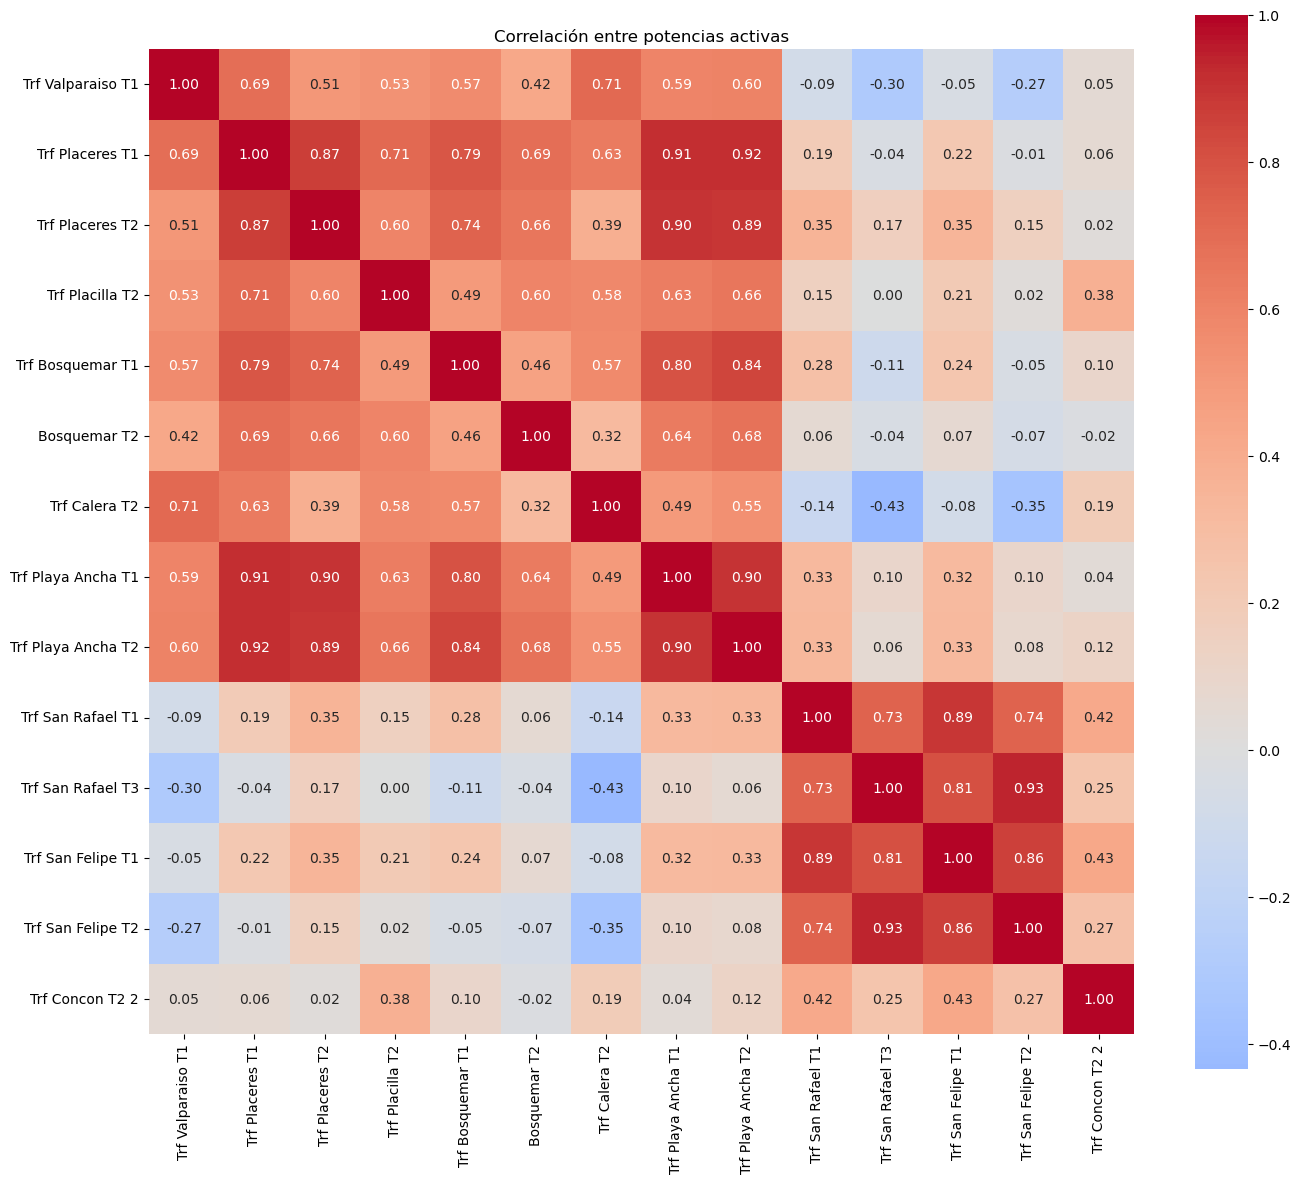

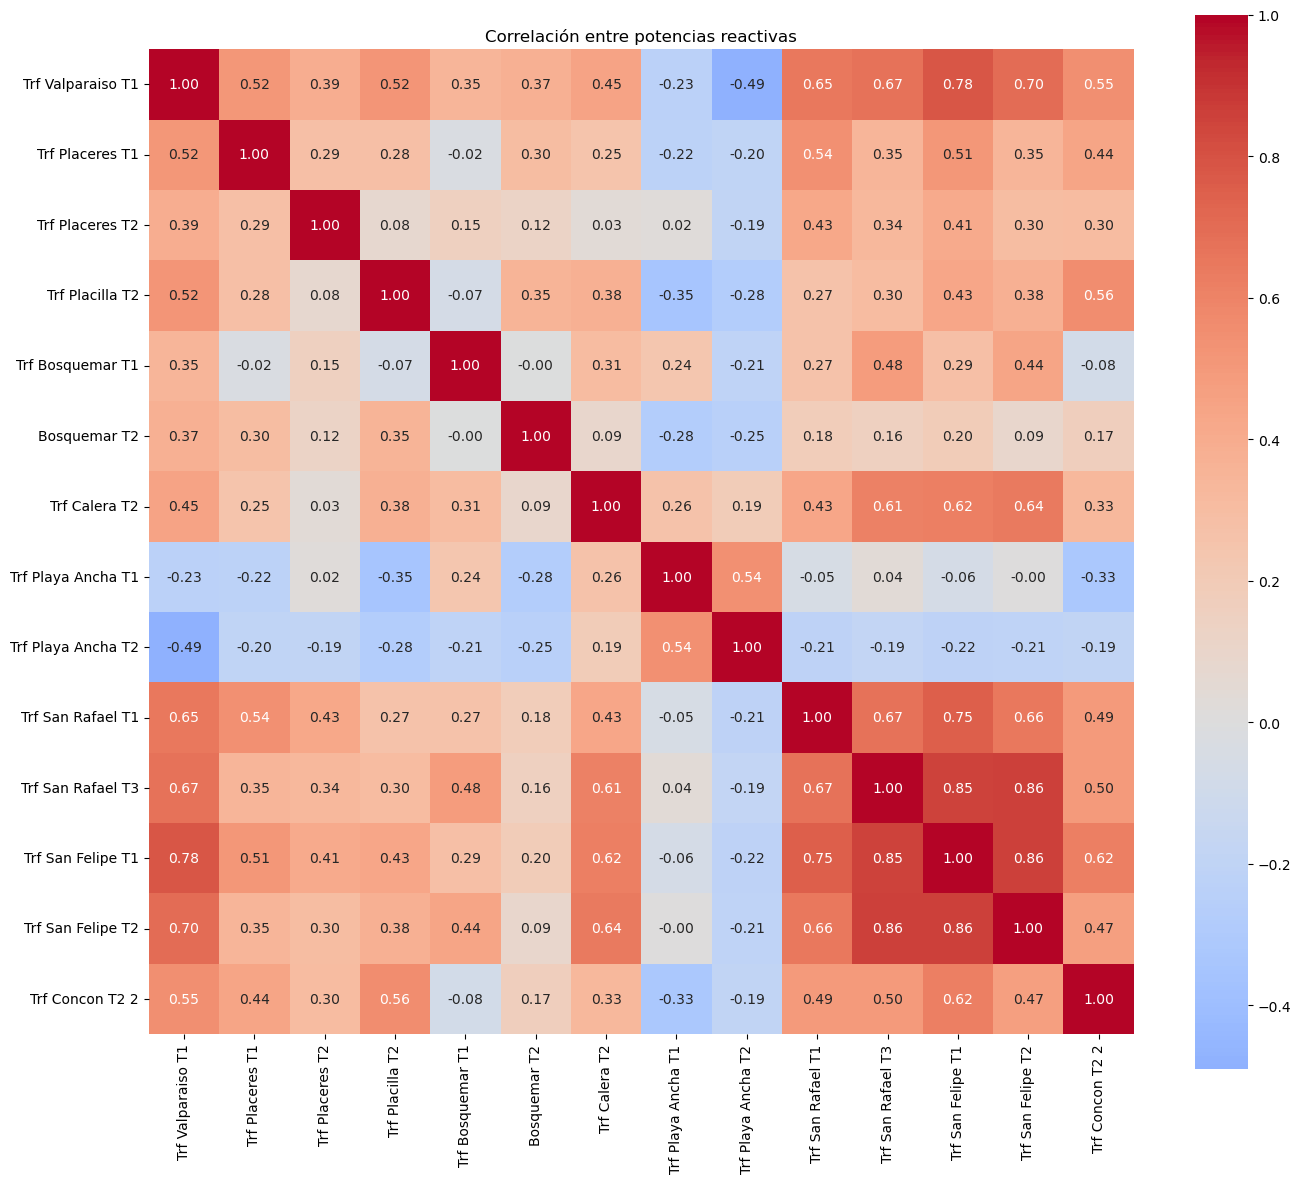

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Crear carpeta si no existe
os.makedirs("figuras_interactivas", exist_ok=True)

# Lista de columnas activas
cols_activas = [
    "SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW)",
    "SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW)",
    "SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW)",
    "SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW)",
    "SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW)",
    "SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW)",
    "SE_Calera.Trf_Calera_T2 Potencia activa media (kW)",
    "SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW)",
    "SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW)",
    "SE_San_Rafael.Trf_San_Rafael_T1 Potencia activa media (kW)",
    "SE_San_Rafael.Trf_San_Rafael_T3 Potencia activa media (kW)",
    "SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW)",
    "SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW)",
    "SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW)",
]

# Crear lista de columnas reactivas automáticamente
cols_reactivas = [
    col.replace("Potencia activa", "Potencia reactiva").replace("Real Power", "Reactive Power").replace("kW", "kVAr")
    for col in cols_activas
]


# Crear diccionarios de nombres cortos
nombres_cortos_activas = {
    col: col.split(".")[1].split(" Potencia")[0].replace("_", " ")
    for col in cols_activas
}

# Corrección manual para Bosquemar T2
nombres_cortos_activas["SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW)"] = "Bosquemar T2"

nombres_cortos_reactivas = {
    col: col.split(".")[1].split(" Potencia")[0].replace("_", " ")
    for col in cols_reactivas
}

nombres_cortos_reactivas["SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr)"] = "Bosquemar T2"


# Renombrar columnas para graficar
df_activas_ren = df[cols_activas].rename(columns=nombres_cortos_activas)
df_reactivas_ren = df[cols_reactivas].rename(columns=nombres_cortos_reactivas)

# Gráfico de correlación potencias activas
plt.figure(figsize=(14, 12))
sns.heatmap(df_activas_ren.corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0,
            annot_kws={"size": 10}, square=True)
plt.title('Correlación entre potencias activas', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.savefig("figuras_interactivas/correlacion_potencias_activas.png", dpi=300)
plt.show()
plt.close()

# Gráfico de correlación potencias reactivas
plt.figure(figsize=(14, 12))
sns.heatmap(df_reactivas_ren.corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0,
            annot_kws={"size": 10}, square=True)
plt.title('Correlación entre potencias reactivas', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.savefig("figuras_interactivas/correlacion_potencias_reactivas.png", dpi=300)
plt.show()
plt.close()


### Correlación de P y Q para cada transformador

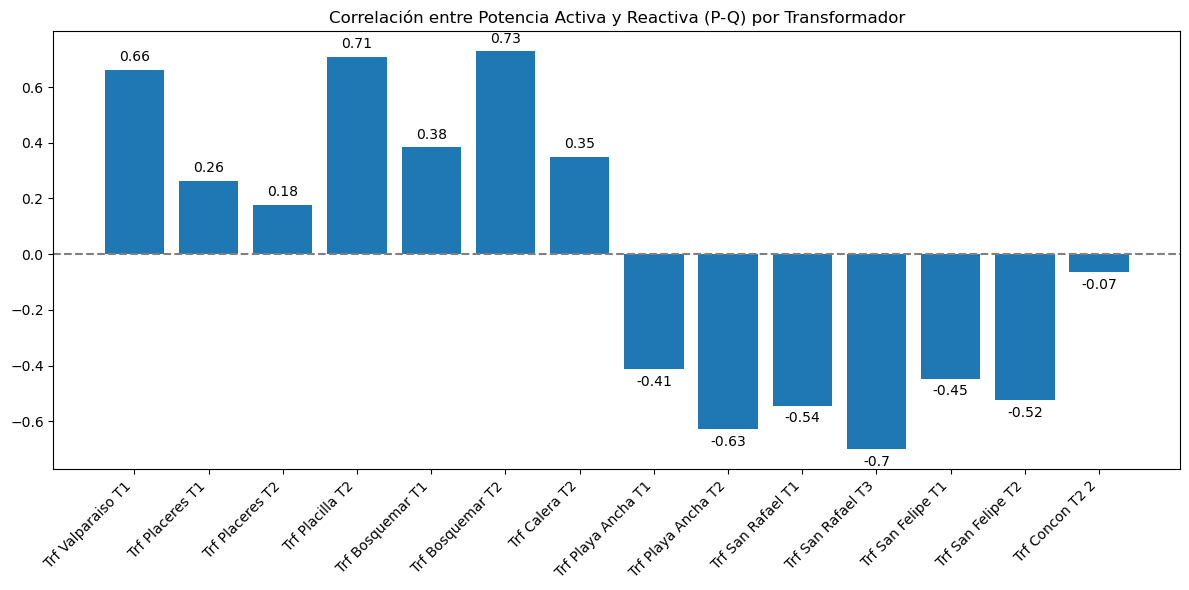

         Transformador  Correlación P-Q
0    Trf Valparaiso T1         0.661801
1      Trf Placeres T1         0.262816
2      Trf Placeres T2         0.178026
3      Trf Placilla T2         0.707650
4     Trf Bosquemar T1         0.384034
5     Trf Bosquemar T2         0.728547
6        Trf Calera T2         0.349768
7   Trf Playa Ancha T1        -0.411841
8   Trf Playa Ancha T2        -0.628643
9    Trf San Rafael T1        -0.543798
10   Trf San Rafael T3        -0.699703
11   Trf San Felipe T1        -0.446098
12   Trf San Felipe T2        -0.523368
13     Trf Concon T2 2        -0.065533


In [37]:
# Calcular la correlación P vs Q
correlaciones_pq = []

for base in transformadores_base:
    col_p = [col for col in df.columns if base in col and ("activa" in col or "Real Power" in col)]
    col_q = [col for col in df.columns if base in col and ("reactiva" in col or "Reactive Power" in col)]

    if col_p and col_q:
        col_p = col_p[0]
        col_q = col_q[0]
        corr = df[[col_p, col_q]].corr().iloc[0, 1]
        nombre_corto = base.split(".")[1].replace("_", " ")
        correlaciones_pq.append((nombre_corto, corr))

# Crear DataFrame
df_correlacion_pq = pd.DataFrame(correlaciones_pq, columns=["Transformador", "Correlación P-Q"])

# Graficar
plt.figure(figsize=(12, 6))
bars = plt.bar(df_correlacion_pq['Transformador'], df_correlacion_pq['Correlación P-Q'])
plt.title('Correlación entre Potencia Activa y Reactiva (P-Q) por Transformador')
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='gray', linestyle='--')

# Agregar etiquetas
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02 * (-1 if yval < 0 else 1), round(yval, 2),
             ha='center', va='bottom' if yval >= 0 else 'top')

plt.tight_layout()
plt.show()

# Mostrar tabla si deseas
print(df_correlacion_pq)
